# Carter Thiel

## Project 3 - Hybrid Images



### Write up:

I was pretty satisfied by my results in this project. I would say eveything went smoothly until I had to use my own images to create a hybrid of them. It seemed like an impossible task to align the images before importing them, but I found out that it was pretty simple and all it took was using the move tool in photoshop to align both sets of eyes, and then export the images. Another problem I had was with the make_laplacian_pyramid method. It wasn't working very well when creating the hybrid images and I couldn't figure out why, but I think the issue was caused by assigning the original image to the created pyramid list (pyramid = [img]). Once I realized that it was not neccessary to assign the original image to the created list similar to the gaussian pyramid method, it started to work much better I think(Uses the gaussian pyramid instead). So the corrected way was: (pyramid = [])

A weakness of this method is having to manually align the images before hand. Ideally, my program could align the eyes or something of the sort on its own. I also hard coded the parameters for when I blur the images, which might not be ideal for all images used to create the hybrid images.

I would consider being able to customize the levels and split is a strength of this method, so that you can slightly customize the look for each hybrid image you create.

For all of my hybrid images, I found that using a lower split value helped to get a better looking hybrid image. When I put the value over 3, it seemed like one of the layers would dominate the other. I'm not sure if there is an issue with my code which is causing this, but I found 3 to be the sweet spot for my cases. I also found that the levels parameter worked best in the 6-8 range, and would also start to cause one layer to dominate the other if I put it under 6, for example. I actually wasn't able to go over 8, maybe because it gets too small?

With more time I would have liked to have dedicated more effort in attempting to win the art gallery competition. I knew there was so many possibilities to create a funny hybrid image, or like you mentioned in the document, having something like political satire or some other type of advanced humor in the hybrid image. I racked my brain for a good five minutes and the only thing I could come up with was Dr. Duke Spurlock. I also don't think my images are perfect, and I am sure there is something I could modify in my code to make the images work better. If I stand far away though, I definitely see more of Duke!

It's no surprise I would like to post my first hybrid image to the art gallery, Dr. Duke Spurlock, which is also the title of my image. If it is okay with you of course. Maybe you get tired of your face being used in almost every project/lab you assign?

I hopefully have met all of the requirements of the project:

- The four functions are correctly implemented
- Three different hybrid images displayed
- All six points covered in write up
     

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Methods

In [ ]:
def make_gaussian_pyramid(img, levels, debug):
    pyramid = [img]
    for i in range(1, levels):
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        img = cv2.resize(blur, None, fx=0.5, fy=0.5)
        pyramid.append(img)

        if debug == True:
            plt.imshow(img, cmap='gray')
            plt.show

    return pyramid

def show_pyramid(pyramid):
    canvas = np.zeros((500, 1000), dtype=np.uint8)

    x = 0
    for image in pyramid:
        disp_img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        row = slice(0, disp_img.shape[0])
        col = slice(x, x + disp_img.shape[1])

        canvas[row, col] = disp_img

        x += disp_img.shape[1]

    return canvas

def make_laplacian_pyramid(img, levels, debug):
    pyramid = []

    current_img = img.astype(np.float32)

    for i in range(levels):
        blur = cv2.GaussianBlur(current_img, (5, 5), 0)

        laplacian = cv2.subtract(current_img, blur)
        pyramid.append(laplacian)

        if debug == True:
            plt.imshow(laplacian, cmap='gray')
            plt.show()

        current_img = cv2.resize(blur, None, fx=0.5, fy=0.5)

    return pyramid

def make_hybrid_image(img1, img2, levels, split):
    gaussian_pyramid2 = make_gaussian_pyramid(img2, levels, debug)
    laplacian_pyramid1 = make_laplacian_pyramid(img1, levels, debug)

    # zeros_like returns array of zeros same as given array
    hybrid_img = np.zeros_like(img1, dtype=np.float32)

    for i in range(split):
        laplacian = cv2.resize(laplacian_pyramid1[i], (img1.shape[1], img1.shape[0]))
        hybrid_img += laplacian

    for i in range(split, levels):
        gaussian = cv2.resize(gaussian_pyramid2[i], (img1.shape[1], img1.shape[0]))
        hybrid_img += gaussian

    norm_hybrid = cv2.normalize(hybrid_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    norm_hybrid = norm_hybrid.astype(np.uint8)

    return norm_hybrid

Testing 1

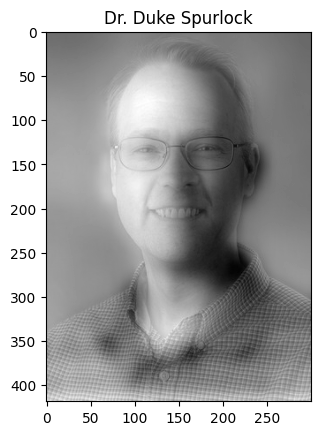

In [ ]:
img1 = cv2.imread('Scott1.jpg')
img2 = cv2.imread('Duke1.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

debug = False

final = make_hybrid_image(gray1, gray2, 6, 3)

if not debug:
    plt.imshow(final, cmap='gray')
    plt.title("Dr. Duke Spurlock")
    plt.show

Testing 2

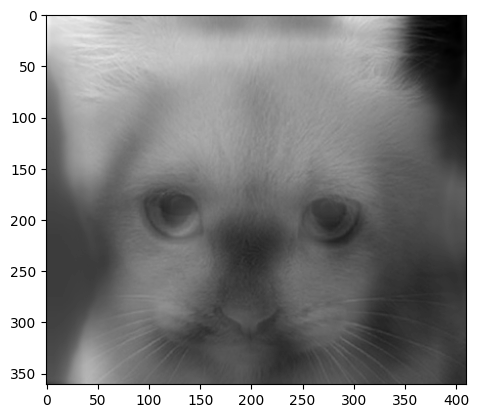

In [ ]:
img1 = cv2.imread('cat2.jpg')
img2 = cv2.imread('littledog.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

debug = False

final = make_hybrid_image(gray1, gray2, 6, 3)

if not debug:
    plt.imshow(final, cmap='gray')
    plt.show

Testing 3

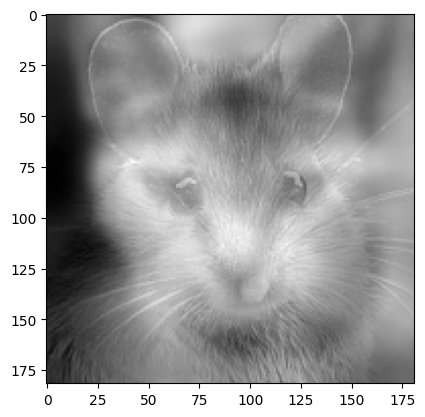

In [ ]:
img1 = cv2.imread('mouse.jpg')
img2 = cv2.imread('cat1.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

debug = False

final = make_hybrid_image(gray1, gray2, 6, 2)

if not debug:
    plt.imshow(final, cmap='gray')
    plt.show()